In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]
scaler = MinMaxScaler()
scaler.fit(data)
print(scaler.transform(data))

In [ ]:
from sklearn import preprocessing
data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]
scaler = preprocessing.StandardScaler().fit(data)
data = scaler.transform(data)
data

In [ ]:
from sklearn.model_selection import train_test_split
X_data = range(10)
y_data = range(10)
 
print("random_state ditentukan")

for i in range(3):
  X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 42)
  print(y_test)

print("random_state tidak ditentukan")
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = None)
    print(y_test)

In [ ]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

# load iris dataset
iris = datasets.load_iris()

# pisahkan atribut dan label pada iris dataset
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
# menghitung panjang/jumlah data pada x_test
len(x_test)


In [ ]:
import sklearn
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import cross_val_score

# load iris datasets
iris = datasets.load_iris()

# mendefinisikan label dan atribut pada datasets
x = iris.data
y = iris.target

# membuat model dengan decision tree classifier
clf = tree.DecisionTreeClassifier()

# mengevaluasi performa model dengan cross_val_score
scores = cross_val_score(clf, x, y, cv=5)
scores

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# membaca file csv
iris = pd.read_csv('Iris.csv')

# melihat informasi iris
iris.info()

# Melihat informasi dataset pada 5 baris pertama
iris.head()

# menghilangkan kolom yang tidak penting
iris.drop('Id',axis=1,inplace=True)

x = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']

#membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=123)

from sklearn.tree import DecisionTreeClassifier

#membuat model Decision Tree
tree_model = DecisionTreeClassifier()

#melatih model dengan data train
tree_model = tree_model.fit(x_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = tree_model.predict(x_test)

acc_score = round(accuracy_score(y_pred, y_test), 3)
print('Accuracy ', acc_score)

print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True)

In [ ]:
import numpy as np

#data jumlah kamar 
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])

#data harga rumah $
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

# menampilkan scatter plot dari dataset
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.scatter(bedrooms, house_price)

from sklearn.linear_model import LinearRegression

#melatih model dengan linear regression.fit()
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

In [ ]:
import pandas as pd

df = pd.read_csv('Social_Network_Ads.csv')
df.head()
df.info()

data = df.drop(columns=['User ID'])

data = pd.get_dummies(data)
data

predictions = ['Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male']
x = data[predictions]
y = data['Purchased']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_data = scaler.transform(x)
scaled_data = pd.DataFrame(scaled_data, columns = x.columns)
scaled_data.head()

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)

from sklearn import linear_model

model = linear_model.LogisticRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train)

In [ ]:
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')

df.head(3)

df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 
                        'Annual Income (k$)': 'annual_income', 
                        'Spending Score (1-100)': 'spending_score' })
df['gender'].replace(['female', 'male'], [0,1], inplace=True)

df.head(3)

from sklearn.cluster import KMeans

x = df.drop(['CustomerID','gender'], axis=1)

clusters = []

for i in range(1,11):
  km = KMeans(n_clusters=i).fit(x)
  clusters.append(km.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)),y = clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(x)
 
# menambahkan kolom label pada dataset
x['Labels'] = km5.labels_
 
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=x['annual_income'], y=x['spending_score'], hue=x['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
atribut = iris.data
label = iris.target

x_train, x_test, y_train, y_test = train_test_split(atribut, label, test_size=0.2, random_state=1)

from sklearn import tree

decision_tree = tree.DecisionTreeClassifier()
model_pertama = decision_tree.fit(x_train, y_train)
model_pertama.score(x_train, y_train)

from sklearn.decomposition import PCA

#membuat objhek PCA dengan 4 principal component
pca = PCA(n_components=4)

#mengaplikasikan PCA pada datasets
pca_attributes = pca.fit_transform(x_train)

#melihat varian dari setiap atribut
pca.explained_variance_ratio_

#PCA dengan 2 principal component
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

#uji akurasi classifier
model2 = decision_tree.fit(x_train_pca, y_train)
model2.score(x_test_pca, y_test)

In [ ]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

df.head()
df.info()

x = df[df.columns[:8]]
y = df['Outcome']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

from sklearn.svm import SVC

clf = SVC()
clf.fit(x_train, y_train)
clf.score(x_train, y_train)


In [ ]:
import pandas as pd

df = pd.read_csv('Salary_Data.csv')
df.head()
df.info()

import numpy as np

x = df['YearsExperience']
y = df['Salary']

x = x[:,np.newaxis]

from sklearn.svm import SVR
model = SVR(C=1000, gamma=0.05, kernel='rbf')
model.fit(x,y)

import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot(x, model.predict(x))

In [ ]:
import pandas as pd

data = pd.read_csv('Salary_Data.csv')

import numpy as np

x=data['YearsExperience']
y=data['Salary']

x=x[:,np.newaxis]

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

model = SVR()
parameters = {'kernel':['rbf'],
              'C':     [1000, 10000, 100000],
              'gamma': [0.5, 0.05, 0.005]
    }
grid_search = GridSearchCV(model, parameters)

grid_search.fit(x, y)
print(grid_search.best_params_)

model_baru  = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(x, y)

import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot(x, model_baru.predict(x))

In [ ]:
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

In [ ]:
import tensorflow as tf
import zipfile,os

local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dategen = ImageDataGenerator(
                  rescale=1./255, 
                  rotation_range=20,
                  horizontal_flip=True,
                  shear_range=0.2,
                  fill_mode='nearest')

test_datagen = ImageDataGenerator(
                  rescale=1./255)

train_generator = train_dategen.flow_from_directory(
        train_dir,# direktori data latih
        target_size=(150, 150), #mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        class_mode='binary')# karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas gunakan class_mode = 'binary'
        class_mode='binary')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes==0:
   print('messy')
  else:
   print('clean')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 2188 files [00:00, 3218.92 files/s]


Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 34, 34, 128)       73856     
                                     

Saving IMG_20220903_222821.jpg to IMG_20220903_222821 (1).jpg
IMG_20220903_222821.jpg
Paper


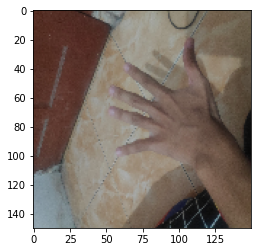

In [25]:
""" Nama : Kodrat Nusantara
    Username Dicoding: nussaa
    Email : kodratnusantara@gmail.com
"""

import tensorflow as tf
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

!pip install split_folders
import splitfolders

splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images',  '/tmp/rockpaperscissors/data', seed=1, ratio=(0.6, 0.4))

base_dir = '/tmp/rockpaperscissors/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_paper_dir = os.path.join(train_dir,'paper')
train_rock_dir = os.path.join(train_dir,'rock')
train_scissors_dir = os.path.join(train_dir,'scissors')

validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale= 1./255,
      rotation_range=20,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(
      rescale=1./255,
      validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
      train_dir,
      target_size=(150,150),
      batch_size=16,
      class_mode='categorical',
      shuffle = True,
      color_mode='rgb')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=16,
    class_mode='categorical',
    shuffle = True,
    color_mode='rgb')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2)

import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes[0,0]!=0:
   print('Paper')
  elif classes[0,1]!=0:
   print('Rock')
  else:
   print('Scissors')